# 2.1 신경망과의 첫 만남

## 코드 2-1 케라스에서 MNIST 데이터셋 적재하기

In [34]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### 훈련 데이터 확인

In [35]:
train_images.shape

(60000, 28, 28)

In [36]:
len(train_labels)

60000

In [37]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### 테스트 데이터 확인

In [38]:
test_images.shape

(10000, 28, 28)

In [39]:
len(test_labels)

10000

In [40]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

## 코드 2-2 신경망 구조

In [41]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

## 코드 2-3 컴파일 단계

In [42]:
network.compile(optimizer = 'rmsprop',
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])

## 코드 2-4 이미지 데이터 준비하기 (여기 확실한 이해가 안됨)
훈련 시작 전, 데이터를 네트워크에 맞는 크기로 바꾸고, 모든 값을 0과 1사이로 스케일을 조정.
(60000, 28, 28) 크기의 배열을, 0과 1사이의 값을 가지는 float 타입의 (60000, 28 * 28)크기인 배열로 바꿈.

In [43]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

## 코드 2-5 레이블 준비하기

In [44]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [45]:
network.fit(train_images, train_labels, epochs=5, batch_size = 128)

Epoch 1/5
60000/60000 [==============================] - 4s 71us/step - loss: 0.2611 - accuracy: 0.9249
Epoch 2/5
60000/60000 [==============================] - 4s 71us/step - loss: 0.1052 - accuracy: 0.9691
Epoch 3/5
60000/60000 [==============================] - 4s 71us/step - loss: 0.0688 - accuracy: 0.9795
Epoch 4/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.0506 - accuracy: 0.9848
Epoch 5/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.0373 - accuracy: 0.9889


In [46]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print ('test_accuacy: ', test_acc)
print ('test_loss: ', test_loss)

10000/10000 [==============================] - 0s 46us/step
test_accuacy:  0.9803000092506409
test_loss:  0.06497137348912656


# 2.2 신경망을 위한 데이터 표현

## 2.2.1 스칼라(0D 텐서)

In [47]:
import numpy as np
x = np.array(12)
x

array(12)

In [48]:
x.ndim

0

### 2.2.2 벡터(1D 텐서)

In [50]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [54]:
x.ndim

1

### 2.2.3 행렬(2D 텐서)

In [58]:
x = np.array([[5, 78, 2, 34, 0],
             [6, 79, 3, 35, 1],
             [7, 80, 4, 36, 2]])

In [59]:
x.ndim

2

### 2.2.4 3D 텐서와 고차원 텐서

In [60]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])

In [61]:
x.ndim

3

### 2.2.5 핵심 속성

In [63]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [64]:
print(train_images.ndim)

3


In [65]:
print(train_images.shape)

(60000, 28, 28)


In [66]:
print(train_images.dtype)

uint8


## 코드 2.6 다섯 번째 이미지 출력하기

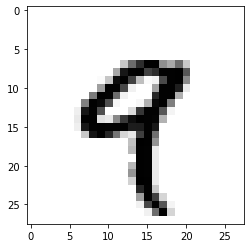

In [73]:
digit = train_images[4]

from matplotlib import pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

### 넘파이로 텐서 조작하기

In [75]:
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [76]:
my_slice = train_images[10:100, :, :]

In [77]:
my_slice.shape

(90, 28, 28)

In [78]:
my_slice = train_images[10:100, 0:28, 0:28]

In [79]:
my_slice.shape

(90, 28, 28)

### 2.2.7 배치 데이터

딥러닝은 한 번에 전체 데이터셋을 처리하지 않고, 그 대신 작은 배치로 나누어 처리한다.

batch = train_images[:128]

batch = train_images[128:256]

batch = train_images[128 * n:128 * (n + 1)]

### 2.2.8 텐서의 실제 사례

우리가 사용할 데이터는 대부분 다음 중 하나에 속함
* 벡터 데이터 : (samples, features) 크기의 2D 데이터
* 시계열 데이터 또는 시퀀스 데이터 : (samples, timestamps, features) 크기의 3D 텐서
* 이미지 : (samples, height, width, channels) 또는 (samples, channels, height, width) 크기의 4D 텐서
* 동영상 : (samples, frames, height, width, channels) 또는 (samples, frames, channels, height, width) 크기의 5D 텐서

### 2.2.9 벡터 데이터

대부분의 경우에 해당
예)
* 사람의 나이, 우편 번호, 소득으로 구성된 인구 통계 데이터. <br>
각 사람은 3개의 값을 가진 벡터로 구성되고 10만 명이 포함된 전체 데이터셋은 => (100000, 3)
크기의 텐서에 저장가능<br>

* (공통 단어 2만 개로 만든 사전에서) 각 단어가 등장한 횟수로 표현된 텍스트 문서 데이터 셋. <br>
각 문서는 2만 개의 원소 사전에 있는 단어마다 하나의 원소에 대응합니다)를 가진 벡터로 인코딩될 수 있음.<br>500개의 문서로 이뤄진 전체 데이터셋은 (500, 20000) 크기의 텐서로 저장된다

### 2.2.10 시계열 데이터 또는 시퀀스 데이터

### 2.2.11 이미지 데이터

### 2.2.12 비디오 데이터
60초짜리 144x256 유튜브 비디오 클립을 초당 4프레임으로 샘플링하면 240프레임이 되고, <br> 이런 비디오 클립을 4개 가진 배치는 (4, 240, 144, 256, 3) 크기의 텐서에 저장되어 총 106,168,320개의 값이 있음<br> 이 텐서의 dtype을 float32로 했다면 각 값이 32비트로 저장될 것이므로 텐서의 저장 크기는 405MB가 된다.

## 2.3 신경망의 톱니바퀴: 텐서 연산

### 2.3.1 원소별 연산

일반적으로 relu 연산 구현처럼 for 반복문을 사용함<br>
그러나 넘파이 배열을 다룰 때 최적화된 넘파이 내장 함수로 이런 연산들을 처리 가능<br>
넘파이는 시스템에 설치된 BLAS가 있음 Basic Linear Algebra Subprogram.<br>
BLAS는 고도로 병렬화되고 효율적인 저수준의 텐서 조작 루틴, 전형적으로 포트란이나 C로 구현되어 있음<br>
넘파이는 다음과 같은 원소별 연산을 엄청난 속도로 처리

import numpy as np<br>
z = x + y #원소별 덧셈<br>
z = np.maximum(z, 0.) # 원소별 렐루 함수

### 2.3.2 브로드 캐스팅 (예시 이해가 잘 되지 않음)

크기가 다른 두 텐서가 더해질 때, 모호하지 않고 실행 가능하다면 작은 텐서가 큰 텐서의 크기에 맞추어 브로드캐스팅된다. <br> 브로드캐스팅은 두 단계로 이뤄짐
* 큰 텐서의 ndim에 맞도록 작은 텐서에(브로드캐스팅 축이라 불리는) 축이 추가된다
* 작은 텐서가 새 축을 따라서 큰 텐서의 크기에 맞도록 반복

### 2.3.3 텐서 점곱 (예시 이해가 잘 되지 않음)

### 2.3.4 텐서 크기 변환

In [84]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])

In [85]:
print (x.shape)

(3, 2)


In [89]:
x = x.reshape((6, 1))

In [90]:
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [91]:
x = x.reshape((2, 3))

In [92]:
x

array([[0., 1., 2.],
       [3., 4., 5.]])

In [93]:
x = np.zeros((300, 20))

In [94]:
x = np.transpose(x)

In [95]:
print (x.shape)

(20, 300)


### 2.3.5 텐서 연산의 기하학적 해석

텐서의 내용은 어떤 기하학적 공간에 있는 좌표 포인트로 해석될 수 있기에 모든 텐서 연산은 기하학적 해석이 가능<br> 신경망의 경우 전체적으로 텐서 연산의 연결로 구성된 것으로 모든 텐서 연산은 입력 데이터의 기하학적 변환<br> ex) 섞여 뭉친 색종이 펼치기

## 2.4 신경망의 엔진: 그래디언트 기반 최적화

### 2.4.1 변화율이란?

### 2.4.2 텐서 연산의 변화율: 그래디언트
텐서 연산의 변화율 => 그래디언트

### 2.4.3 확률적 경사 하강법

### 2.4.4 변화율 연결: 역전파 알고리즘

## 2.5 첫 번째 예제 다시 살펴보기

## 2.6 요약